In [16]:
import numpy as np
from libs.lfgenerator import TwoPart, Exponential, Shift
import matplotlib.pyplot as plt

In [17]:
g=np.array([1,2,3,4])
h=np.array([5,4,6,7])

l = np.convolve(np.hstack((g[1:], g)),h, 'valid')
r = np.fft.ifft(np.fft.fft(g)*np.fft.fft(h))


In [45]:
def get_rho(x,y):
    length = x.shape[1]
    dim=x.shape[2]
    rho = []

    for j in range(dim):
        x_j = x[:,:,j]
        y_j = y[:,:,0]
        X = np.fft.fft(x_j, axis=1)
        Y = np.fft.fft(y_j, axis=1)
        Rho = []
        for i in range(length):
            r = np.linalg.lstsq(X[:,[i]],Y[:,[i]])[0].item()
            # r = ((X[:,[i]].T@Y[:,[i]]) / (X[:,[i]].T @ X[:,[i]]))[0,0]
            Rho.append(r)
        Rho = np.array(Rho)
        Rho = np.fft.ifft(Rho)
        rho.append(Rho)
    return np.array(rho)

In [46]:
path_length = 64

# x,y = TwoPart({'centers': [[1.5, 4]],'sigmas':[[4, 4]],'path_len':path_length,'data_num':400000}).generate()
# x,y = Exponential({'lambda':[0.5],'path_len':path_length,'data_num':10000}).generate()
x,y = Shift({'input_dim':2, 'shift': [30,14], 'data_num':100000, 'path_len':path_length}).generate()



/tmp/ipykernel_126833/312903095.py:13: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  r = np.linalg.lstsq(X[:,[i]],Y[:,[i]])[0].item()


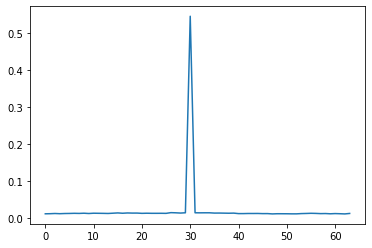

In [47]:
plt.plot(get_rho(x,y)[0])

In [21]:
from dataprepare_tcw.tcw_generator import dataset_generator
data = np.load("dataprepare_tcw/tcw_1980_2022.npy")
train, test = dataset_generator(
        data, length=100, train_test_ratio=0.7, sliding_window=True
    )
T = 90
x = train[:, :T, :]
y = train[:, -T:, :]

/tmp/ipykernel_126833/1330200663.py:13: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  r = np.linalg.lstsq(X[:,[i]],Y[:,[i]])[0].item()


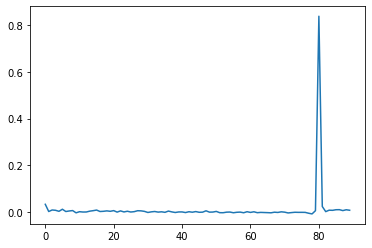

In [23]:
plt.plot(get_rho(x,y)[0])

In [24]:
x_j = x[:,:,0]
y_j = y[:,:,0]
X = np.fft.fft(x_j, axis=1)
Y = np.fft.fft(y_j, axis=1)

In [51]:
np.linalg.lstsq(X[:,[1]],Y[:,[1]])[0]

/tmp/ipykernel_126833/2119804018.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  np.linalg.lstsq(X[:,[1]],Y[:,[1]])[0]


array([[0.80050645+0.46183093j]])

In [52]:
(X[:,[1]].T@Y[:,[1]]) / (X[:,[1]].T @ X[:,[1]])

array([[1.11237393+8.51971016e-05j]])